# Post-Processing Psuedo Surge Runs

In [1]:
# import numpy as np 
# import xarray as xr 
# import matplotlib.pyplot as plt 


# #fp = '/Users/andrewnolan/sfuvault/ELMERICE/Synthetic/Synthetic/Farinotti_smooth/Exp_01_elevation_dependent/hdf5/lk_pre_1002a_mb_0.9_off.nc'
# fp1 = '/Users/andrewnolan/sfuvault/ELMERICE/Synthetic/Synthetic/perturbed_10-harmonics_ratio-0.01/Exp_01_elevation_dependent/hdf5/LK_PRE_1002a_MB_2.4_OFF.nc'
# fp2 = '/Users/andrewnolan/sfuvault/ELMERICE/Synthetic/Synthetic/perturbed_10-harmonics_ratio-0.01/Exp_01_elevation_dependent/hdf5/LK_PRE_1002a_MB_2.41_OFF.nc'
# fp3 = '/Users/andrewnolan/sfuvault/ELMERICE/Synthetic/Synthetic/perturbed_10-harmonics_ratio-0.01/Exp_01_elevation_dependent/hdf5/LK_PRE_1002a_MB_2.39_OFF.nc'

# data1 = xr.open_dataset(fp1)
# data2 = xr.open_dataset(fp2)
# data3 = xr.open_dataset(fp3)

# #plt.imshow(data.mask.T, aspect='auto', origin='lower')

# # plt.imshow(data.z_s - data.z_b, aspect='auto', origin='lower')

# # plt.colorbar()


# data1['H'] = data1.z_s - data1.z_b
# data2['H'] = data2.z_s - data2.z_b
# data3['H'] = data3.z_s - data3.z_b

# plt.plot(data1.t, data1.H.integrate('x') / data1.H.sel(t=0).integrate("x"))
# plt.plot(data2.t, data2.H.integrate('x') / data2.H.sel(t=0).integrate("x"))
# plt.plot(data3.t, data3.H.integrate('x') / data3.H.sel(t=0).integrate("x"))

# plt.axhline(1, ls='--', c='gray')
# plt.ylim(0.5, 1.5)

In [2]:

# plt.plot(data1.x, data1.z_s.isel(t=-1))
# plt.plot(data2.x, data2.z_s.isel(t=-1))
# plt.plot(data3.x, data3.z_s.isel(t=-1))

# plt.plot(data1.x, data1.z_b.sel(t=0))

In [3]:
# fp1 = '../Synthetic/Farinotti_smooth/Exp_02_Sliding/h5/Farinotti_filter_Savgol_p5_w21.nc'
# fp2 = '/Users/andrewnolan/sfuvault/ELMERICE/Synthetic/Synthetic/perturbed_10-harmonics_ratio-0.01/Exp_02_Sliding/h5/pseduo_surge_test.nc'
# Data1 = xr.open_dataset(fp1)
# Data2 = xr.open_dataset(fp2)

# # Add varibales H (ice thickness) to dataset
# Data1['H'] =  Data1.z_s -  Data1.z_b
# Data2['H'] =  Data2.z_s -  Data2.z_b

# fig, ax = plt.subplots(1,1, sharex=True, sharey=True)

# ax.plot(Data1.x, Data1.z_s.isel(t=0),  label='Smoothed $z_s(t=0)$')
# ax.plot(Data2.x, Data2.z_s.isel(t=0),  label='Perturbed $z_s(t=0)$')

# ax.plot(Data1.x, Data1.z_s.isel(t=-1), label='Smoothed $z_s(t=9.9)$')
# ax.plot(Data2.x, Data2.z_s.isel(t=-1), label='Perturbed $z_s(t=9.9)$')

# ax.plot(Data1.x, Data1.z_b.isel(t=-1), label='Smoothed $z_b$')
# ax.plot(Data2.x, Data2.z_b.isel(t=-1), label='Perturbed $z_b$')

# ax.legend()

# ax.set_ylabel('m a.s.l.')
# ax.set_xlabel('x-coord (m)')

# fig.tight_layout()
# fig.savefig('../plots/surge_bed_compare.png', dpi=600, facecolor='w', bbox_inches='tight')

In [4]:
import numpy as np 
import xarray as xr 

from scipy import interpolate
import matplotlib.pyplot as plt 
from matplotlib import animation, rc


plt.rcParams['text.usetex'] = True
plt.rcParams['animation.html'] = 'jshtml'


fp = '../Synthetic/Exp_02_Sliding/Farinotti_filter_Savgol_p5_w21/h5/Farinotti_filter_Savgol_p5_w21.nc'
fp = '/Users/andrewnolan/sfuvault/ELMERICE/Synthetic/Synthetic/perturbed_ratio-0.01/harmonics_1-10/Exp_02_Sliding/h5//pseduo_surge_test_int.nc'
Data = xr.open_dataset(fp)


In [5]:
!ls $fp

/Users/andrewnolan/sfuvault/ELMERICE/Synthetic/Synthetic/perturbed_ratio-0.01/harmonics_1-10/Exp_02_Sliding/h5//pseduo_surge_test_int.nc


In [6]:
# Make space time grid /for pcolormesh
XX, TT = np.meshgrid(Data.x, Data.t)

# Add varibales H (ice thickness) to dataset
Data['H'] =  Data.z_s -  Data.z_b

In [7]:
#Data.close()

In [10]:
Data.info()

xarray.Dataset {
dimensions:
	t = 101 ;
	x = 284 ;

variables:
	float64 x(x) ;
	float64 t(t) ;
	float64 z_s(x, t) ;
		z_s:description = Surface Elevation ;
		z_s:units = m a.s.l. ;
	float64 z_b(x, t) ;
		z_b:description = Bed Elevation ;
		z_b:units = m a.s.l. ;
	float64 v_s(x, t) ;
		v_s:description = Surface Velocity (magnitude) ;
		v_s:units = m a^{-1} ;
	float64 v_b(x, t) ;
		v_b:description = Basal Velocity (magnitude) ;
		v_b:units = m a^{-1} ;
	float64 v_mean(x, t) ;
		v_mean:description = Depth Averaged Velocity (magnitude) ;
		v_mean:units = m a^{-1} ;
	float64 b_dot(x, t) ;
		b_dot:description = Surface Mass balance (Elevation dependent) ;
		b_dot:units = m a^{-1} ;
	float64 beta(x, t) ;
		beta:description = Slip Coefficient in Elmer/Ice. Equal $\Beta^{-2}$ for Linear Wertman Sliding of form $	au =eta^2 u$ ;
		beta:units = m (MPa a)^{-1} ;
	float64 H(x, t) ;

// global attributes:
	:description = Elmer/Ice Pseudo Surge model run ;
}

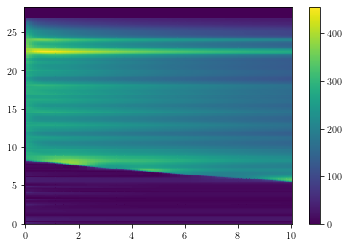

In [11]:
plt.pcolormesh(TT, XX/1000., Data.v_b.T,shading='auto')
plt.colorbar()

In [13]:
Data.t

<xarray.DataArray 't' (t: 101)>
array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,
        2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,
        3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,
        4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,
        6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,
        7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,
        8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,
        9.6,  9.7,  9.8,  9.9, 10. ])
Coordinates:
  * t        (t) float64 0.0 0.1 0.2 0.3 0.4 0.5 ... 9.5 9.6 9.7 9.8 9.9 10.0

In [ ]:
plt.pcolormesh(TT, XX/1000., Data.v_s.T, vmin=0, vmax=500, shading='auto')
plt.colorbar()

In [ ]:
plt.plot(Data.x, Data.isel(t=0).v_s)
plt.plot(Data.x, Data.isel(t=0).v_mean)

Page 310 of Cuffey and Patterson: 

> These relations also show that surface velocity and depth-averaged velocity are similar. If
ub = 0, Eqs. 8.35 and 8.36 give u/us = [n +1]/[n +2] = 0.8 for n = 3. If, on the other hand,
motion is entirely by slip, u = us = ub. This sets limits on the likely value of the depth-averaged
velocity.

In [ ]:
plt.plot(Data.x,Data.isel(t=0).v_mean / Data.isel(t=0).v_s)

In [ ]:
fig, ax = plt.subplots(1,1)

im   = ax.pcolormesh(TT, XX/1000., (Data.z_s - Data.z_b).T,shading='gouraud')
cbar = fig.colorbar(im)
cbar.set_label('$\Delta H$ (m)',rotation=270,labelpad=20)

ax.set_ylabel('x coord. (km)')
ax.set_xlabel('Time (a)')
ax.set_title('Uncorrected Ice Thickness')

# fig.savefig('/Users/andrewnolan/Desktop/space_time_4_Alexi_&_Gwenn/00_Uncorrected_H.png', 
#             dpi = 600, bbox_inches='tight', facecolor='w')

In [ ]:
import scipy.signal as signal


In [ ]:
f, Pxx = signal.periodogram(Data.z_b.isel(t=-1), scaling='spectrum')
plt.plot(f,np.sqrt(Pxx))

f, Pxx = signal.periodogram(Data.z_s.isel(t=-1), scaling='spectrum')
plt.plot(f,np.sqrt(Pxx))

plt.yscale('log')
plt.ylim(10e-1, None)

Clearly, we still have some pimples downstream of the terminus which need to be corrected. 

In [ ]:
def first_nonzero(arr, axis, invalid_val=-1):
    """https://stackoverflow.com/a/47269413/10221482"""
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

In [ ]:
# Find where the ice thickness is less than 0
mask       = (Data.H.values[::-1] < 10.).astype(np.int)
# Find the first point where __mask__ is nonzero, i.e. there is no ice thickness
fist_point = first_nonzero(mask, axis = 0)
# Itterare over the first non-zero points. Set all downstream of it 
# to 1 (i.e. True meaning ice thickness should be 0).
for i, point in enumerate(fist_point): 
    mask[point:, i] = 1

In [ ]:
fig, ax = plt.subplots(1,1)

im   = ax.pcolormesh(TT, XX/1000., mask[::-1].T, shading='gouraud')
cbar = fig.colorbar(im)
cbar.set_label('Boolean (0 = False, 1 = True)',rotation=270,labelpad=20)

ax.set_ylabel('x coord. (km)')
ax.set_xlabel('Time (a)')
ax.set_title('Valid Ice Thickness Mask')

# fig.savefig('/Users/andrewnolan/Desktop/space_time_4_Alexi_&_Gwenn/01_Valid_H_mask.png', 
#             dpi = 600, bbox_inches='tight', facecolor='w')

In [ ]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(TT, XX/1000., 
                   Data.H.values.T - np.where(mask[::-1] == 0, Data.H.values, 0).T, 
                   shading='gouraud',
                   cmap = 'Reds')

cbar = fig.colorbar(im)
cbar.set_label('$\Delta H$ (m)',rotation=270,labelpad=20)

ax.set_ylabel('x coord. (km)')
ax.set_xlabel('Time (a)')
ax.set_title('Ice Thickness Correction')

# fig.savefig('/Users/andrewnolan/Desktop/space_time_4_Alexi_&_Gwenn/02_H_correction.png', 
#             dpi = 600, bbox_inches='tight', facecolor='w')

In [ ]:
Data.z_s.values  =  np.where(mask[::-1] == 0, Data.z_s.values, Data.z_b.values)
Data.v_s.values  =  np.where(mask[::-1] == 0, Data.v_s.values, 0)
Data.v_b.values  =  np.where(mask[::-1] == 0, Data.v_b.values, 0)
Data.H.values    =  np.where(mask[::-1] == 0, Data.H.values,   0)

In [ ]:
fig, ax = plt.subplots(1,1)

im   = ax.pcolormesh(TT, XX/1000., Data.H.T,shading='gouraud')
cbar = fig.colorbar(im)
cbar.set_label('$H$ (m)',rotation=270,labelpad=20)

ax.set_ylabel('x coord. (km)')
ax.set_xlabel('Time (a)')
ax.set_title('Corrected Ice Thickness')

# fig.savefig('/Users/andrewnolan/Desktop/space_time_4_Alexi_&_Gwenn/03_corrected_H.png', 
#             dpi = 600, bbox_inches='tight', facecolor='w')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
# for t in range(12):

plt.plot(Data.x, np.where(mask == 0, Data.H.values[::-1], 0)[:, 13])

In [ ]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(TT,
                   XX/1000.,
                   Data.v_s.T,
                   cmap='magma',
                   shading='gouraud')


ax.set_ylabel('x coordinate (km)')
ax.set_xlabel('Time (a)')
ax.set_title('Surface Velocity')

cbar = fig.colorbar(im)
cbar.set_label(r'$v_{\rm s}$ (m a$^{-1}$)',rotation=270,labelpad=20)

# fig.savefig('/Users/andrewnolan/Desktop/space_time_4_Alexi_&_Gwenn/04_surf_vel.png', 
#             dpi = 600, bbox_inches='tight', facecolor='w')

In [ ]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(TT,
                   XX,
                   Data.beta.T,
                   cmap='magma',
                   shading='gouraud')

ax.set_ylabel('x coordinate')
ax.set_xlabel('Time (a)')
ax.set_title('Elmer/Ice Slip Coefficient')

cbar = fig.colorbar(im)
cbar.set_label(r'$\beta^{-2}$',rotation=270,labelpad=20)

# fig.savefig('/Users/andrewnolan/Desktop/space_time_4_Alexi_&_Gwenn/05_beta.png', 
#             dpi = 600, bbox_inches='tight', facecolor='w')

In [ ]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(TT,
                   XX/1000.,
                   Data.v_b.T,
                   cmap='magma',
                   shading='gouraud')


ax.set_ylabel('x coordinate (km)')
ax.set_xlabel('Time (a)')
ax.set_title('Basal Velocity')

cbar = fig.colorbar(im)
cbar.set_label(r'$v_{\rm b}$ (m a$^{-1}$)',rotation=270,labelpad=20)

# fig.savefig('/Users/andrewnolan/Desktop/space_time_4_Alexi_&_Gwenn/06_bed_vel.png', 
#             dpi = 600, bbox_inches='tight', facecolor='w')

In [ ]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(TT,
                   XX/1000.,
                   100*((Data.v_b/ Data.v_s).T),
                   cmap='magma',
                   vmin = 0, 
                   vmax = 100, 
                   shading='gouraud')

ax.set_ylabel('x coordinate')
ax.set_xlabel('Time (a)')
ax.set_title(r'Fractional \% of $v_{\rm s}$ from $v_{\rm b}$')

cbar = fig.colorbar(im)
cbar.set_label(r'$ 100 \times \frac{v_{\rm b}}{v_{\rm s}}$ (\%)', rotation=270,labelpad=20)

# fig.savefig('/Users/andrewnolan/Desktop/space_time_4_Alexi_&_Gwenn/07_fractional_sliding.png', 
#             dpi = 600, bbox_inches='tight', facecolor='w')

# A nice animation: 

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6.6667,4))

ax.set_xlim(Data.x.min(), Data.x.max())
ax.set_ylim(Data.z_s.min()-25, Data.z_s.max()+200)
ax.set_ylabel('m a.s.l.')
ax.set_xlabel('x-coord (m)')

ax.plot( Data.x,Data.isel(t=0).z_b,color='saddlebrown')
ax.fill_between(Data.x, np.ones(Data.x.shape[0])*ax.get_ylim()[0], Data.isel(t=0).z_b, color='saddlebrown', alpha=0.5)

collection = ax.fill_between(Data.x, Data.isel(t=0).z_b, Data.isel(t=0).z_s, color='lightblue', alpha=0.5)

ax.plot(Data.x, Data.isel(t=0).z_s, 'k:', alpha=0.5, label='$z_s(t=0.0)$')
ax.legend()


ax.set_title(r'$z_{\rm b}(x) = z_{\rm b_{\rm F}} + \sum_{k=1}^{10} A_{k} \sin \left( \frac{2 \pi}{k \bar H} x \right)$')
ax.set_aspect(9)

line1, = ax.plot([], [], lw=2, color='lightblue', label='$z_s(t=0.0)$',)
line   = [line1]

def animate(i):
    if i == 0:
        ax.collections.clear()
        line[0].set_data(Data.x, Data.isel(t=i).z_s)
        line[0].set_label('$z_s(t={{{:.1f}}})$'.format(i/10))

        ax.fill_between(Data.x, np.ones(Data.x.shape[0])*ax.get_ylim()[0], Data.isel(t=0).z_b, color='saddlebrown', alpha=0.5)
        ax.fill_between(Data.x, Data.isel(t=0).z_b, Data.isel(t=0).z_s, color='lightblue', alpha=0.5)
        ax.legend()
    else:
        ax.collections.clear()
        line[0].set_label('$z_s(t={{{:.1f}}})$'.format(i/10))
        line[0].set_data(Data.x,  Data.isel(t=i).z_s)
        ax.fill_between(Data.x, np.ones(Data.x.shape[0])*ax.get_ylim()[0], Data.isel(t=i).z_b, color='saddlebrown', alpha=0.5)
        ax.fill_between(Data.x, Data.isel(t=i).z_b, Data.isel(t=i).z_s, color='lightblue', alpha=0.5)
    
        ax.legend()

    return line

anim = animation.FuncAnimation(fig, animate, 
                               frames=range(0,Data.t.shape[0]), interval=100, blit=True)

plt.tight_layout()
plt.close()
anim

In [ ]:
anim.save('/Users/andrewnolan/Desktop/animation.mp4', fps=10, dpi=800)

# VTU files:

In [ ]:
import os
import meshio
import xarray as xr

In [ ]:
# Find the files matching out run/step name
fp = '../Synthetic/perturbed_10-harmonics_ratio-0.01/Exp_02_Sliding/'
fn_list = [os.path.join(fp,fn) for fn in os.listdir(fp) if 'pseduo_surge_test' in fn]
# Sort the file list based on the timestep
fn_list.sort(key=lambda i: int(i.split('_')[-1].split('.')[0][1:]))

In [ ]:
# tempdataset = xr.Dataset(data_vars = test_dict, 
#                          coords    = {'yvals' : (('ynode','xnode'),ydim),
#                           'xvals' : (('ynode','xnode'),xdim)} 
#                         )

In [ ]:
test_dict = {}
for key in mesh.point_data.keys():
    
    if key == 'mesh update':
        continue
        
    new_key = '_'.join(key.split(' '))

    if np.shape(mesh.point_data[key])[1] == 3: 
        test_dict[new_key+'_x'] = (('ynode','xnode'), mesh.point_data[key][:,0].reshape(ygrid_pts,xgrid_pts))
        test_dict[new_key+'_y'] = (('ynode','xnode'), mesh.point_data[key][:,1].reshape(ygrid_pts,xgrid_pts))
        test_dict[new_key+'_m'] = (('ynode','xnode'), 
                               vm(mesh.point_data[key][:,0].reshape(ygrid_pts,xgrid_pts), 
                                   mesh.point_data[key][:,1].reshape(ygrid_pts,xgrid_pts)))
    else:
        test_dict[new_key] = (('ynode','xnode'), mesh.point_data[key][:,0].reshape(ygrid_pts,xgrid_pts))
    
#     print( np.shape(mesh.point_data[key]))
#     # replace space in names with underscores
#     print('_'.join(key.split(' ')))

In [ ]:

#def vtu_read(fn_list, NX, NY):


#info about mesh grid (set by user in model - Mesh/mesh.grd )
xgrid_cells = 283
ygrid_cells = 10


xgrid_pts   = xgrid_cells + 1
ygrid_pts   = ygrid_cells + 1

xnodes      = np.array(range(xgrid_pts))      # ynodes 
ynodes      = np.array(range(ygrid_pts))      # xnodes
tsteps      = np.array(range(len(fn_list)))   # number of time steps

timestep = [] #list of data arrays
for path in fn_list:
    t_val = fn_list.index(path)
    print(path)
    mesh = meshio.read(path, file_format= 'vtu') #mesh the file

    velx = mesh.point_data['velocity'][:,0].reshape((ygrid_pts,xgrid_pts)) #reshape the mesh coordinates
    vely = mesh.point_data['velocity'][:,1].reshape((ygrid_pts,xgrid_pts))
    velm = vm(velx,vely)
    
    xdim = mesh.points[:,0].reshape((ygrid_pts,xgrid_pts))
    ydim = mesh.points[:,1].reshape((ygrid_pts,xgrid_pts))

    tempdataset = xr.Dataset(data_vars = {'vel_x' : (('ynode','xnode'), velx) ,
                                          'vel_y' : (('ynode','xnode'), vely) ,
                                          'vel_m' : (('ynode','xnode'), velm)},
                             coords    = {'yvals' : (('ynode','xnode'),ydim),
                                          'xvals' : (('ynode','xnode'),xdim)})
    timestep.append(tempdataset)

datacomb = xr.concat(timestep, dim='t')

In [ ]:
plt.rcParams['text.usetex'] = False

datacomb.sel(t=0).vel_m.plot.contourf(x = 'xvals', y = 'yvals', levels=25)

In [ ]:

plt.ylim(1200,2750)
plt.fill_between(x, np.ones(x.shape[0])*plt.ylim()[0], NS_dat[0,:,8], color='saddlebrown',alpha=0.5)

plt.pcolormesh(datacomb.sel(t=0).xvals,
               datacomb.sel(t=0).yvals, 
               datacomb.sel(t=0).vel_m,
               shading='gouraud')

plt.plot(x,NS_dat[0,:,7],ls='--',color='skyblue')
#plt.plot(x,NS_dat[0,:,8],ls='--',color='saddlebrown')


plt.colorbar()
plt.savefig('/Users/andrewnolan/Desktop/test.png',dpi=600,bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,3))

ax.set_xlim(NS_dat[0,:,4].min(),NS_dat[0,:,4].max())
ax.set_ylim(NS_dat[0,:,8].min()-25, NS_dat[0,:,8].max()+200)
ax.set_ylabel('m a.s.l.')
ax.set_xlabel('x-coord (m)')

ax.plot(x,NS_dat[0,:,8],color='saddlebrown')
ax.fill_between(x, np.ones(x.shape[0])*ax.get_ylim()[0], NS_dat[0,:,8], color='saddlebrown', alpha=0.5)

ims = []
for t in np.arange(0,100): 
    im = ax.pcolormesh(datacomb.sel(t=t).xvals, 
                       datacomb.sel(t=t).yvals, 
                       datacomb.sel(t=t).vel_m, 
                       clim = (0, 200),
                       shading='gouraud')
    ims.append([im])

fig.colorbar(im, ax=ax)

#ims = [[im] for im in ims]
anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
plt.tight_layout()
plt.close()
anim

In [ ]:
datacomb.to_netcdf("/Users/andrewnolan/Desktop/test_xarray.nc")